In [130]:
!pip install pandas scikit-learn openpyxl matplotlib --quiet

In [131]:
from google.colab import files

uploaded = files.upload()

Saving pickindata.xlsx to pickindata (2).xlsx


In [132]:
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [133]:
# 파일 경로 설정 (코랩에 업로드된 파일의 경로로 변경 필요)
file_path = '/content/pickindata.xlsx'  # 데이터 파일 경로
data = pd.read_excel(file_path)

# 데이터 미리보기
print(data.head())

   국적 최종학력 TOPIK 관심직무 합격 여부
0  유럽   석사    6급  마케팅    합격
1  태국   석사    6급  마케팅    합격
2  태국   석사    6급  마케팅    합격
3  태국   석사    6급  마케팅    합격
4  중국  재학중    6급  마케팅    합격


In [134]:
"# 필요한 열만 선택"
columns_to_use = ['국적', '최종학력', 'TOPIK', '관심직무', '합격 여부']
data = data[columns_to_use]

# 결측치 확인
print(data.isnull().sum())

국적       0
최종학력     0
TOPIK    0
관심직무     0
합격 여부    0
dtype: int64


In [135]:
# 결측치 처리 (필요시)
data = data.dropna()

# 각 열마다 별도 인코더 생성 및 확인
encoders = {}
for col in ['국적', '최종학력', 'TOPIK', '관심직무', '합격 여부']:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])  # 변환
    encoders[col] = encoder  # 인코더 저장

    # 고유값 매핑 출력
    print(f"'{col}' 매핑: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")

# 특성과 레이블 분리
X = data[['국적', '최종학력', 'TOPIK', '관심직무']]
y = data['합격 여부']

'국적' 매핑: {'네팔': 0, '말레시이아': 1, '말레이시아': 2, '몽골': 3, '베트남': 4, '브라질': 5, '우즈베키스탄': 6, '유럽': 7, '인도네시아': 8, '일본': 9, '중국': 10, '태국': 11}
'최종학력' 매핑: {'박사': 0, '석사': 1, '재학중': 2, '학사': 3}
'TOPIK' 매핑: {'3급': 0, '4급': 1, '5급': 2, '6급': 3}
'관심직무' 매핑: {'HR': 0, '경영기획': 1, '경영지원': 2, '구매': 3, '글로벌 개발': 4, '글로벌 비즈니스': 5, '글로벌 인사관리': 6, '글로벌 인사관리 GHR': 7, '글로벌 전략': 8, '마케팅': 9, '마케팅 서포터즈': 10, '사업개발': 11, '연구개발': 12, '전략': 13, '전장부품 H/W개발': 14, '전장부품 개발': 15, '지역 전문가': 16, '해외영업': 17}
'합격 여부' 매핑: {'불합격': 0, '합격': 1}


In [136]:
# 데이터 정규화 (SVM은 정규화된 데이터에 민감)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [137]:
# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SVM 모델 학습
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7745098039215687
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85        82
           1       0.46      0.80      0.58        20

    accuracy                           0.77       102
   macro avg       0.70      0.78      0.71       102
weighted avg       0.85      0.77      0.79       102



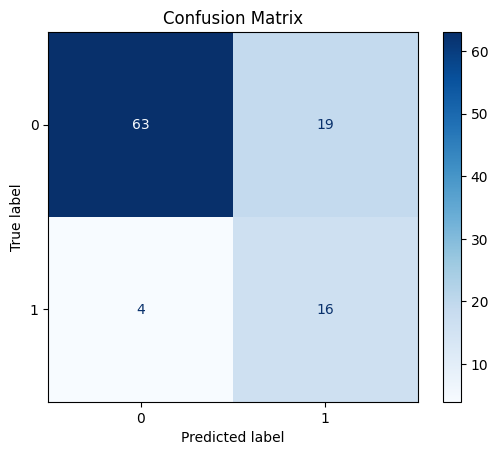

In [138]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# **1. Confusion Matrix (혼동 행렬) 시각화**
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

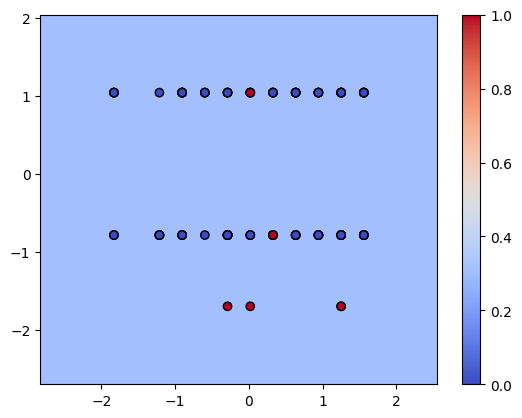

In [139]:
# 시각화를 위한 2차원 데이터 변환 (주요 두 특성만 사용)
import numpy as np

# 시각화를 위한 2차원 데이터 변환 (주요 두 특성만 사용)
X_vis = X_scaled[:, :2]  # 첫 두 열만 사용

# 훈련 데이터와 테스트 데이터로 분리
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

# # '합격 여부' 열을 0과 1로 변환
# y_train_vis = y_train_vis.map({'불합격': 0, '합격': 1})
# y_test_vis = y_test_vis.map({'불합격': 0, '합격': 1})

# SVM 모델 학습
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 예측 결과 얻기
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 색상 맵 설정
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.colorbar()  # 색상 표시
    plt.show()

# X_test_vis와 y_test_vis를 numpy 배열로 변환
X_test_vis = np.array(X_test_vis)
y_test_vis = np.array(y_test_vis)

# 결정 경계 시각화 실행
plot_decision_boundary(X_test_vis, y_test_vis.astype(int), svm_model_vis)

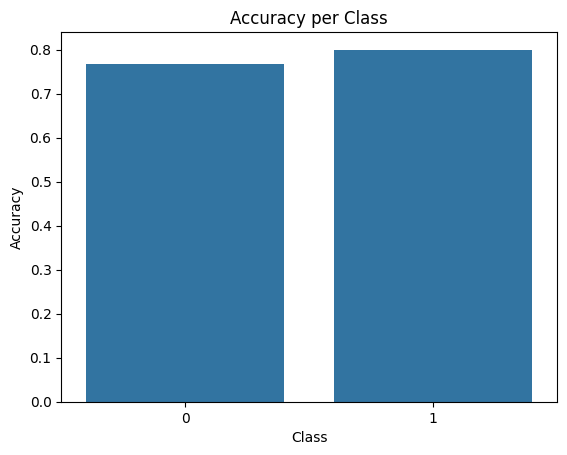

In [140]:
import seaborn as sns

# **3. 각 클래스별 정확도 시각화**
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
class_accuracy = results_df.groupby('Actual')['Predicted'].apply(lambda x: (x == x.mode()[0]).mean())

sns.barplot(x=class_accuracy.index, y=class_accuracy.values)
plt.title("Accuracy per Class")
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.show()

Cross-Validation Scores: [0.8627451  0.87128713 0.8019802  0.73267327 0.81188119]
Mean Cross-Validation Accuracy: 0.8161


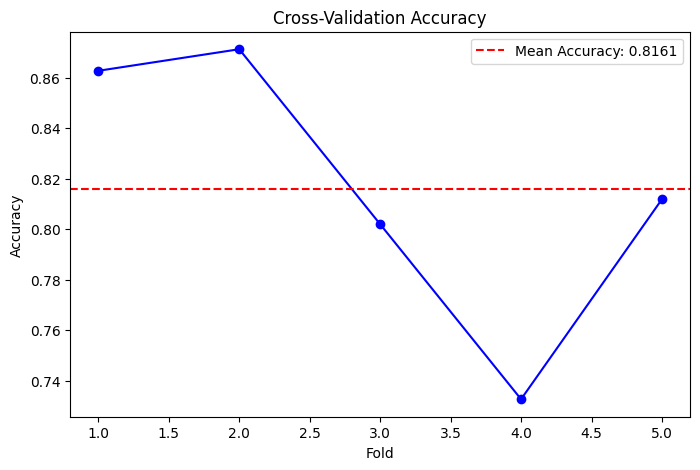

In [141]:
# **4. 교차 검증**
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)  # 5-겹 교차 검증
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# 교차 검증 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='blue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {cv_scores.mean():.4f}')
plt.title("Cross-Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [142]:
import joblib

# 모델 저장
joblib.dump(svm_model, '/content/pickin_model.pkl')

['/content/pickin_model.pkl']

In [143]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [151]:
from google.colab import files

# 파일 다운로드
files.download('/content/pickin_model.pkl')  # 저장한 모델 파일 경로

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [153]:
files.download('/content/scaler.pkl')  # 저장한 모델 파일 경로

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
joblib.dump(encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [156]:
files.download('/content/label_encoders.pkl')  # 저장한 모델 파일 경로

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>